In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import mxnet as mx

from joblib import Parallel, delayed
import time

In [2]:
scoremaps_rootdir = '/home/yuncong/CSHL_scoremaps_lossless'
if not os.path.exists(scoremaps_rootdir):
    os.makedirs(scoremaps_rootdir)
    
predictions_rootdir = '/home/yuncong/CSHL_patch_predictions'
if not os.path.exists(predictions_rootdir):
    os.makedirs(predictions_rootdir)

iterators_rootdir = '/home/yuncong/CSHL_mxnet_iterators'
if not os.path.exists(iterators_rootdir):
    os.makedirs(iterators_rootdir)

In [3]:
labels =  ['BackG', '5N', '7n', '7N', '12N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL']
label_dict = dict([(l,i) for i, l in enumerate(labels)])

# label_dict = dict([(l,i) for i, l in enumerate(labels)] + \
#                   zip(other_labels, range(len(labels), len(labels)+len(other_labels))))

In [5]:
stack = 'MD594'
first_bs_sec, last_bs_sec = section_range_lookup[stack]

In [ ]:
n_labels = len(labels)
M = np.zeros((n_labels, n_labels), np.int)
M_soft = np.zeros((n_labels, n_labels))

In [171]:
for sec in range(first_bs_sec, last_bs_sec+1):

    lst_filepath = iterators_rootdir + '/%(stack)s/%(sec)04d/%(stack)s_%(sec)04d_roi1_test.lst' % \
            {'stack':stack, 'sec': sec}
    
    if not os.path.exists(lst_filepath):
        continue
    
    with open(lst_filepath, 'r') as f:
        true_labels = np.array([int(l.split('\t')[1]) for l in f.readlines()])

    prediction_filepath = predictions_rootdir + '/%(stack)s/%(sec)04d/%(stack)s_%(sec)04d_roi1_predictions.npy' % \
            {'stack':stack, 'sec': sec}

    if not os.path.exists(prediction_filepath):
        continue

    print sec

    predictions = np.load(prediction_filepath)
    predictions = predictions[:, [-1] + range(0,9)]  # to be backward compatible with previous label order in which BackG is at the end

#     n = len(true_labels)

    hard_predictions = np.argmax(predictions, axis=1)
    #     has_labels = np.where(true_labels != -1)[0]

    for hp, tl in zip(hard_predictions, true_labels):
        if tl == -1: continue
        M[tl, hp] += 1

    for probs, tl in zip(predictions, true_labels):
        if tl == -1: continue
        M_soft[tl] += probs

150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303


In [163]:
n_labels = len(labels)
M = np.zeros((n_labels, n_labels), np.int)
for hp, tl in zip(hard_predictions, true_labels):
    if tl == -1: continue
    M[tl, hp] += 1
    
M_soft = np.zeros((n_labels, n_labels))
for probs, tl in zip(predictions, true_labels):
    if tl == -1: continue
    M_soft[tl] += probs

In [193]:
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if cm.dtype.type is np.int_:
        fmt = '%d'
    else:
        fmt = '%.2f'
    
    for x in xrange(len(labels)):
        for y in xrange(len(labels)):
            if not np.isnan(cm[y,x]):
                plt.text(x,y, fmt % cm[y,x], 
                         horizontalalignment='center',
                         verticalalignment='center');

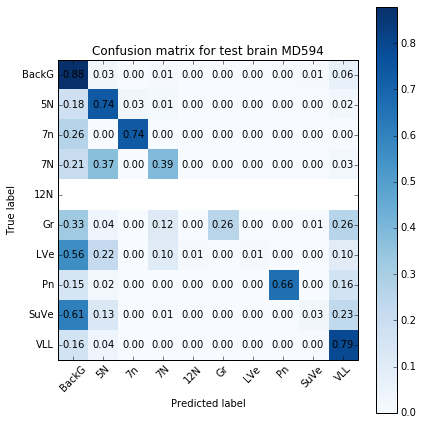

In [192]:
# plot_confusion_matrix(M, title='Confusion matrix for test brain MD594', labels=labels);

cm_normalized = M.astype(np.float)/M.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Confusion matrix for test brain MD594', labels=labels);

# cm_soft_normalized = M_soft.astype(np.float)/M_soft.sum(axis=1)[:, np.newaxis]
# plot_confusion_matrix(cm_soft_normalized, title='soft Confusion matrix for test brain MD594', labels=labels);